# <a id='toc1_'></a>[Trabalho Prático 1](#toc0_)
Universidade Federal de Minas Gerais, 2023.

Trabalho sobre Geometria Computacional apresentado para a disciplina Algoritmos 2.

**Estudante 1:** Brisa do Nascimento Barbosa

**Matrícula:** 2021037856

**Estudante 2:** Mateus Krause Eleoterio

**Matrícula:** 2021038038

**Estudante 3:** Henrique Matos de Vasconcellos

**Matrícula:** 2021037899



**Table of contents**<a id='toc0_'></a>    
- [Trabalho Prático 1](#toc1_)    
  - [Introdução](#toc1_1_)    
  - [Utilitários](#toc1_2_)    
    - [Bibliotecas](#toc1_2_1_)    
    - [Classes](#toc1_2_2_)    
    - [Preparação do Dataset](#toc1_2_3_)    
  - [Algoritmos Geométricos](#toc1_3_)    
    - [Envoltória Convexa](#toc1_3_1_)    
    - [Árvore de Segmentos](#toc1_3_2_)    
    - [Interseções](#toc1_3_3_)    
  - [Modelo de Classificação](#toc1_4_)    
    - [Reta perpendicular](#toc1_4_1_)    
    - [Modelo de Reta](#toc1_4_2_)    
    - [Classificador](#toc1_4_3_)    
    - [Métricas](#toc1_4_4_)    
  - [Função Principal e Visualização](#toc1_5_)    
    - [Gráfico 📉](#toc1_5_1_)    
    - [Driver 🚗](#toc1_5_2_)    
  - [Testes do Modelo](#toc1_6_)    
    - [Iris 🌸](#toc1_6_1_)    
    - [Breast Cancer 🔬](#toc1_6_2_)    
    - [Segment 🪢](#toc1_6_3_)    
    - [Adult 🧑](#toc1_6_4_)    
    - [Dermatology 🥼](#toc1_6_5_)    
    - [Galo 🐓](#toc1_6_6_)    
    - [New Thyroid 🩺](#toc1_6_7_)    
    - [Twonorm 📊](#toc1_6_8_)    
    - [Zoo 🦁](#toc1_6_9_)    
    - [Kr-vs-K ♟️](#toc1_6_10_)    
    - [Lymphography 💉](#toc1_6_11_)    
    - [Digits 7️⃣](#toc1_6_12_)    
    - [Extras ➕](#toc1_6_13_)    
      - [Synthetic-1 🐧](#toc1_6_13_1_)    
      - [Synthetic-2 🐈](#toc1_6_13_2_)    
      - [Synthetic-3 🐺](#toc1_6_13_3_)    
  - [Conclusões](#toc1_7_)    
  - [Referências](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Introdução](#toc0_)
Neste trabalho, nos dedicamos ao desenvolvimento de um algoritmo de aprendizado supervisionado destinado à criação de um modelo de classificação. Esse modelo tem como objetivo atribuir rótulos a amostras desconhecidas com base nas características extraídas de um conjunto de treinamento. A premissa fundamental é a de que, ao entender as características principais das amostra: de treinamento com diferentes rótulos, nosso algoritmo será capaz de generalizar e fazer previsões precisas para novos dados.

Para isso, debruçamos sobre a revisão e aplicação prática de algoritmos geométricos previamente estudados em aula. Com eles, explicitamos a abordagem implementada:

Dado um conjunto de dados bidimensional com duas classes, exploramos:
* Determinar a envoltória convexa das classes, e, com isso, verificar se são linearmente separáveis (podem ser separadas por uma única linha reta)
* Definir um modelo de classificação, que traça uma reta perpedicular ao segmento mínimo entre as classes, e, com isso, determina a qual classe cada ponto pertence a partir da divisão da reta perpendicular
* Avaliação de desempenho do classificador utilizando métricas: precisão, revocação e f1-escore.

Para o escopo deste trabalho, tratamos os dados de maneira a serem bidimensionais e com apenas duas classificações possíveis. E, caso não sejam linearmente separáveis, apenas informamos não ser possível obter um modelo de classificação. Nos algoritmos para reduzir dimensionalidade e avaliação de resultados, excepcionalmente, utilizamos algoritmos já disponíveis, visto que nosso objetivo é apresentar uma implementação de determinados algoritmos geométricos.


## <a id='toc1_2_'></a>[Utilitários](#toc0_)


Definições e pré-processamentos necessários para os algoritmos. Dentre eles, especificamos as bibliotecas utilizadas. Evitados o uso de bibliotecas de estruturas a fim de exercer a implementação prática dessas. Além disso, estabelecemos uma base geométrica (definida pelo ponto, segmento e reta) que será útil mais adiante, e definimos o tratamento do conjunto de dados

### <a id='toc1_2_1_'></a>[Bibliotecas](#toc0_)

O código utiliza as bibliotecas externas *matplotlib*, *math* e *pandas*.O matplotlib é uma biblioteca visual que nos auxilia na visualização dos gráficos. Da biblioteca *math*, usamos *atan2* para cálculo de ângulo polar. Pandas é utilizado para importar, manipular e analisar dados tabulares. Por fim, o *scikit-learn* para computação de métricas e redução de dimensionalidade com o algoritmo *SVD*.

In [ ]:
import matplotlib.pyplot as plt
from math import atan2
import pandas as pd

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD

### <a id='toc1_2_2_'></a>[Classes](#toc0_)

Encapsulamos os objetos geométricos em três classes: Point, Segment e Reta.
* **Point:**

  A classe Point simplemente armazena as coordenadas x e y de um ponto. Os atributos segment_start e segment_end são usados para rastrear a quais segmentos o ponto pertence, caso ele pertença a algum segmento. Implementamos o método de comparação _lt_ para permitir a ordenação de pontos com base nas coordenadas x, usando y como critério de desempate.

* **Segment:**

  Define os segmentos pelo ponto de início *start* e o ponto final *end*. Inclui também um atributo opcional, que é a envoltória *hull* que o pertence (se pertence a alguma). Caso um segmento seja vertical, alteramos ligeiramente sua coordenada *x* a fim de evitar casos indesejados na varredura linear. Além disso, são fornecidos métodos que calculam o ponto médio do segmento, a equação da reta que passa pelo segmento e o *find_y*, que encontra um *x* de acordo a equação e um *y* passado por parâmetro.

* **Reta:**

  Representa uma reta pelo seu declive e interseção, isto é, de acordo a forma geral de uma equação de reta no plano, $y = mx + b$, em que $m$ é o seu declive e $b$ a interseção com o eixo y.


In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.segment_start = None
        self.segment_end = None

    def __lt__(self, other):
        # compara para ordenar pontos com base nas coordenadas x, usando y como desempate
        if self.x < other.x:
            return True
        elif self.x == other.x:
            return self.y < other.y
        else:
            return False

class Segment:
    def __init__(self, start, end, hull = None):
        if start.x == end.x:  # evitar retas verticais na varredura
            start.x += 0.0001

        if start.x > end.x:
            start, end = end, start

        # Talvez mudar aqui
        self.start = start
        self.end = end
        self.start.segment = self
        self.end.segment = self

        self.hull = hull

    @property
    def mid_point(self):
        x_mid = (self.start.x + self.end.x) / 2
        y_mid = (self.start.y + self.end.y) / 2
        return Point(x_mid, y_mid)

    @property
    def equation(self):
        m = (self.end.y - self.start.y) / (self.end.x - self.start.x)
        b = self.start.y - m * self.start.x
        return m, b

    def find_y(self, x):
        m, b = self.equation
        y = m * x + b
        return y

class Reta:
    def __init__(self, slope, intercept):
        self.slope = slope
        self.intercept = intercept

    def equation(self):
        return f'y = {self.slope}x + {self.intercept}'

### <a id='toc1_2_3_'></a>[Preparação do Dataset](#toc0_)

Para atender aos critérios apresentados, temos que tratar os datasets que utilizaremos. Por padrão, decidimos ler arquivos *csv* hospedados em algum repositório remoto e realizar o tratamento adequado dos dados.

Como nossa fonte principal de dados é o [KEEL dataset repository](https://sci2s.ugr.es/keel/category.php?cat=clas#inicio), seus dados são formatados de maneira específica para essa aplicação. Felizmente, podemos obter os mesmos dados já convertidos para nosso formato já que foram disponibilizados por terceiros em um [repositório](https://github.com/Mereep/keel_csv) no Github.

Quanto aos internos do SciKit Learn, para não precisarmos utilizar os métodos da biblioteca para conseguir os datasets de teste inclusos, foi feito o upload de seus arquivos fonte para um repositório de datasets.

Todos os dados foram agrupados em um [repositório único](https://github.com/mateuskrause/keel-sklearn-csv) para facilitar o acesso.

Outros datasets utilizados possuem fontes diversas, especificados na área de testes.

Após a obtenção, temos que fazer alterações nos dados para se adequarem ao nosso modelo de leitura. Isso tudo é feito pela nossa função *load_dataset*:

In [ ]:
# carrega o dataset informado, tratando as entradas e retornando processado
def load_dataset(url, default_classification, seed = 12, attribute_x='Dimension 1', attribute_y='Dimension 2'):

    data = pd.read_csv(url)
    attribute_target = data.columns[-1]

    # filtra a classificação (é ou não é o atributo)
    data = simplify_classification(data, default_classification, attribute_target)

    # filtra para manter apenas as duas primeiras classes alvo na ordem de leitura
    data = condense_dataset(data)

    # atributo alvo padrão após a condensação
    attribute_target = 'Class'

    # embaralha o conjunto de dados com seed 12 (aniversário Sasa)
    data = data.sample(frac=1, random_state=seed).reset_index(drop=True)

    # divide o conjunto de dados em treinamento (70%) e teste (30%)
    train_size = int(0.7 * len(data))
    x_train = data.loc[:train_size - 1, [attribute_x, attribute_y]]
    y_train = data.loc[:train_size - 1, attribute_target]
    x_test  = data.loc[train_size:, [attribute_x, attribute_y]]
    y_test  = data.loc[train_size:, attribute_target]

    # preenche o dataset com os conjuntos respectivos
    dataset = {
        "x_train": x_train,
        "y_train": y_train,
        "x_test": x_test,
        "y_test": y_test
    }

    return dataset

Para podermos separar com uma linha em um espaço bidimensional, temos que possuir apenas duas classificações possíveis. Dessa maneira, é utilizada a classificação de acordo com uma característica. Logo, renomeamos as classificações como sendo "é essa característica" ou "não é essa característica". Para um melhor controle, definimos manualmente o que queremos classificar a partir de uma variável.

Grande parte dos datasets públicos disponíveis possuem múltiplas colunas de informações (features) e, se prosseguirmos dessa maneira, teríamos um espaço n-dimensional com um hiperplano separando nossa classificação caso dados separáveis. Já que não é do intuito do trabalho, utilizamos então o algoritmo de decomposição de valor singular (SVD) para diminuir para duas colunas, isto é, transformá-los em bidimensionais. Utilizamos a implementação padrão na biblioteca *sklearn*.

Após os dados serem ajustados, os embaralhamos (é comum as classificações virem juntas) e separamos uma parte para o treino do nosso modelo (70%) e outra para o teste (30%).

Armazenamos nossas informações de uma forma padronizada, onde *x_train* carrega as features de treinamento e *y_train* as classificações de treinamento. De forma análoga para o teste, temos *x_test* e *y_test*.

In [ ]:
# obtém dois conjuntos de pontos para cada tipo no target
def split_points_by_classes(x_, y_):

    # verifica se usuário inseriu o atributo de classificação corretamente
    unique_classes = set(y_)
    if len(unique_classes) != 2:
        raise ValueError("Verifique se a classificação padrão está correta. Erro: não há classif. distintas")

    # separa cada coordenada dos pontos para uma dimensão
    class1, class2 = 1, 0
    points_1 = []
    points_2 = []

    for i, row in x_.iterrows():
        if y_.iloc[i] == class1:
            points_1.append(Point(row['Dimension 1'], row['Dimension 2']))
        else:
            points_2.append(Point(row['Dimension 1'], row['Dimension 2']))

    return points_1, points_2

# usa SVD para diminuir a dimensão dos dados para 2
def condense_dataset(data):

    # separa as features (X) e o alvo (y)
    target_column = data.columns[-1]
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # inicializa com duas dimensões
    svd = TruncatedSVD(n_components=2)

    # aplica a redução de dimensão aos dados
    transformed_data = svd.fit_transform(X)

    # cria o dataframe com os dados processados
    result = pd.DataFrame({'Dimension 1': transformed_data[:, 0], 'Dimension 2': transformed_data[:, 1], 'Class': y}) # nomes default, usados como chave depois

    return result

# remove especificidade da classificação, transformando apenas em 0 ou 1
def simplify_classification(dataset, true_classification, attribute_target):

    def convert_classification(classification):
        if classification == true_classification:
            return 1
        else:
            return 0

    dataset[attribute_target] = dataset[attribute_target].apply(convert_classification)

    return dataset

## <a id='toc1_3_'></a>[Algoritmos Geométricos](#toc0_)


Baseamos nossos algoritmos de computação geométrica pelo livro 'Algoritmos - Teoria e Prática', de Thomas Cormen. Como primitivas essenciais, apresentamos as seguintes funções:

* **Direção**: Calcula a direção de três pontos $(p_0, p_1, p_2)$ no plano cartesiano de acordo com o produto cruzado, o qual vai indicar se os pontos estão dispostos em sentido horário, anti-horário ou colinear. Isso é fundamental para determinar se $p_2$ está à esquerda ou à direita da linha $p_0p_1$.

* **Distância**: Calcula a distância euclidiana entre os pontos no plano cartesiano por meio da aplicação do Teorema de Pitágoras.

* **No Segmento**: Determina se um ponto está localizado em um segmento delimitado por outros dois pontos. Para tal, realiza comparação das coordenadas do ponto em questão com os limites extremos do retângulo formado pelos pontos extremos do segmento.


In [ ]:
def direction(p0, p1, p2):
    return ((p1.x - p0.x)*(p2.y - p0.y) - (p2.x - p0.x)*(p1.y - p0.y))

def distance(p1, p2):
    return ((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2) ** 0.5

def on_segment(p0, p1, p2):
    if min(p0.x, p1.x) <= p2.x <= max(p0.x, p1.x) and min(p0.y, p1.y) <= p2.y <= max(p0.y, p1.y):
        return True
    return False

### <a id='toc1_3_1_'></a>[Envoltória Convexa](#toc0_)

Dentre os algortimos de envoltória convexa vistos no curso, incluindo, Marcha de Jarvis e Varredura de Graham, entre outros, o Graham se destaca por sua eficiência e complexidade mais desejada. Enquanto a Marcha de Jarvis tem uma complexidade de tempo de $O(n ⋅ h)$, a Varredura de Graham possui uma complexidade de $O(n ⋅ log(n))$.

Vejamos a ideia descritiva do algoritmo que foi implementado abaixo:

> Escolhe-se um ponto pivot que seja o ponto mais abaixo e à esquerda (ou seja, com a menor coordenada y e, em caso de empate, a menor coordenada x). Em seguida, os outros pontos são ordenados de acordo com o ângulo polar que eles formam com o pivot. Essa ordenação ajuda a percorrer os pontos em ordem crescente de ângulo corretamente, assim a envoltória convexa é construída incrementalmente, garantindo a inclusão dos pontos necessários.

In [ ]:
# Calcula a envoltória convexa com Graham-Scan
def graham(points):
    if len(points) < 3:
        return points

    # Pivo mais abaixo e à esquerda
    pivot = min(points, key=lambda p: (p.y, p.x))

    # Ordenação de acordo com ângulo polar
    sorted_points = sorted(points, key=lambda p: (atan2(p.y - pivot.y, p.x - pivot.x), p))

    hull = [sorted_points[0], sorted_points[1], sorted_points[2]]

    for i in range(3, len(sorted_points)):
        while len(hull) > 1 and direction(hull[-2], hull[-1], sorted_points[i]) <= 0:
            hull.pop()
        hull.append(sorted_points[i])

    return hull

Já a função *hull_segments* tem a finalidade de extrair os segmentos que compõem a envoltória convexa de um conjunto de pontos. A cada segmento identificado, colocamos uma flag que indica a qual envoltória pertence. Ademais, os pontos de início e de fim estão sendo organizados circularmente, de forma que um ponto de início de um segmento é o ponto final de outro, já que estamos lidando com um polígono convexo.



In [ ]:
# Retorna segmentos que fazem parte da envoltória convexa
def hull_segments(convex_hull, hull_flag):
    segments = []
    for i in range(len(convex_hull)):
        end_point = convex_hull[i]
        start_point = convex_hull[(i + 1) % len(convex_hull)]
        segment = Segment(start_point, end_point, hull_flag)
        segments.append(segment)

        # Set the segment_start and segment_end attributes for the points
        end_point.segment_end = segment
        start_point.segment_start = segment
    return segments

### <a id='toc1_3_2_'></a>[Árvore de Segmentos](#toc0_)

A fim de determinar a independência linear de duas envoltórias, precisamos considerar se há interseção entre elas. Isso ocorre quando pelo menos um segmento de uma envoltória A intercepta outro da envoltória B. Além disso, para uma análise mais abrangente, também devemos contemplar o caso em que um ponto de uma envoltória está contido na outra, com ou sem interseção. Pois, neste caso, também não é possível traçar uma reta separando as classes.

Tendo um algoritmo simples que verifica interseções, a maneira ingênua de verificar a interseções entre as envoltórias seria verificar cada segmento de cada uma com cada segmento da outra. No entanto, tal como sugerido por (Cormen et al., 2002), a varredura linear significativamente mais eficiente, pois, enquanto o algoritmo ingênuo tem complexidade temporal de $O((n+m)^2)$, em que n representa os elementos da primeira envoltória e m da segunda, a técnica de varredura realiza o mesmo em $O((n+m) log (n+m))$, pois a complexidade que domina, que é de ordenação, realiza cada operação em $O(log (n+m))$.

Para que possamos continuar com a explicação do algoritmo de interseção de envoltórias, é fundamental compreender os princípios essenciais da Árvore AVL implementada. Neste caso, a árvore desempenha self-organization dos segmentos com base em sua posição "find_y(x)", sendo que "x" é um parâmetro chave.

Perceba a existência de três funções não usuais em árvores AVL, sendo elas findPredecessor e findSuccessor, que encontraram, respectivamente, o segmento logo acima do sendo analisado no momento e a outra função o mesmo com o segmento logo abaixo. Já swapSegments vem do caso de generalização, pois seja um conjunto qualquer de segmentos azuis e vermelhos. Caso os azuis interseptem entre si, e não com um vermelho, precisamos notar essa diferença, e nesse caso, mudamos eles de lugar, já que intereceção muda relação acima/abaixo.

In [ ]:
class Node:
    def __init__(self, segment):
        self.segment = segment
        self.left = None
        self.right = None
        self.height = 1  # altura inicial da árvore é 1

class AVLTree:
    def getHeight(self, node):
        if not node:
            return 0
        return node.height

    def getBalance(self, node):
        if not node:
            return 0
        return self.getHeight(node.left) - self.getHeight(node.right) # Fator de equilíbrio do nó

    def rotateLeft(self, z):
        y = z.right
        T2 = y.left

        y.left = z
        z.right = T2

        z.height = 1 + max(self.getHeight(z.left), self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))

        return y

    def rotateRight(self, y):
        x = y.left
        T2 = x.right

        x.right = y
        y.left = T2

        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))

        return x

    def insert(self, root, segment, x):
        # insere ordenamente de acordo com a linha de varredura em determinado x
        if not root:
            return Node(segment)

        if segment.find_y(x) < root.segment.find_y(x):
            root.left = self.insert(root.left, segment, x)
        elif segment.find_y(x) > root.segment.find_y(x):
            root.right = self.insert(root.right, segment, x)
        else:
            return root

        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        balance = self.getBalance(root)

        if balance > 1:
            if segment.find_y(x) < root.left.segment.find_y(x):
                return self.rotateRight(root)
            else:
                root.left = self.rotateLeft(root.left)
                return self.rotateRight(root)

        if balance < -1:
            if segment.find_y(x) > root.right.segment.find_y(x):
                return self.rotateLeft(root)
            else:
                root.right = self.rotateRight(root.right)
                return self.rotateLeft(root)

        return root

    def delete(self, root, segment, x):
        # deleta também de acordo com a linha de varredura em determinado x
        if not root:
            return root

        if segment.find_y(x) < root.segment.find_y(x):
            root.left = self.delete(root.left, segment, x)
        elif segment.find_y(x) > root.segment.find_y(x):
            root.right = self.delete(root.right, segment, x)
        else:
            if (not root.left) or (not root.right):
                temp = root.left if root.right is None else root.right

                if temp is None:
                    temp = root
                    root = None
                else:
                    root = temp

                temp = None
            else:
                temp = self.getMinValueNode(root.right)
                root.segment = temp.segment
                root.right = self.delete(root.right, temp.segment, x)

        if root is None:
            return root

        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        balance = self.getBalance(root)

        if balance > 1:
            if self.getBalance(root.left) >= 0:
                return self.rotateRight(root)
            else:
                root.left = self.rotateLeft(root.left)
                return self.rotateRight(root)

        if balance < -1:
            if self.getBalance(root.right) <= 0:
                return self.rotateLeft(root)
            else:
                root.right = self.rotateRight(root.right)
                return self.rotateLeft(root)

        return root

    def getMinValueNode(self, node):
        if node is None or node.left is None:
            return node

        return self.getMinValueNode(node.left)

    def inOrderReverse(self, root):
        # impressão opcional da ordem dos segmentos de cima para baixo na linha de varredura
        if root:
            self.inOrderReverse(root.right)
            print(root.segment.number, end=" ")
            self.inOrderReverse(root.left)

    def findPredecessor(self, root, segment, x): # ABAIXO
        if not root:
            return None

        predecessor = None
        while root:
            if segment.find_y(x) > root.segment.find_y(x):
                predecessor = root
                root = root.right
            else:
                root = root.left

        return predecessor

    def findSuccessor(self, root, segment, x): # ACIMA
        if not root:
            return None

        successor = None
        while root:
            if segment.find_y(x) < root.segment.find_y(x):
                successor = root
                root = root.left
            else:
                root = root.right

        return successor

    def swapSegments(self, root, segment1, segment2, x):
        # basicamente, deleta e insere de novo
        root = self.delete(root, segment1, x)
        root = self.delete(root, segment2, x)

        point1, point2 = segment1.start, segment2.start
        point1.segment, point2.segment = point2, point1
        segment1.start, segment2.start = point2, point1
        point1, point2 = segment1.end, segment2.end
        point1.segment, point2.segment = point2, point1
        segment1.end, segment2.end = point2, point1

        root = self.insert(root, segment1, x)
        root = self.insert(root, segment2, x)

        return root

    # limpa a árvore, eliminando todos os nós.
    def clearTree(self, root):
        if root:
            root.left = self.clearTree(root.left)
            root.right = self.clearTree(root.right)
            root = None
        return None


### <a id='toc1_3_3_'></a>[Interseções](#toc0_)


Como citado na seção anterior, podemos implementar o seguinte algoritmo, que, dados dois segmentos definidos por seus pontos iniciais e finais, determina se interceptam ou não. Ele começa calculando a direção de quatro pontos: os pontos iniciais e finais de cada segmento, usando a função direction. Com base nessas direções, o código verifica se os segmentos se cruzam. Se a orientação de dois pontos do primeiro segmento for oposta à orientação dos pontos do segundo segmento e vice-versa, isso indica uma interseção. Além disso, o código aborda casos especiais em que os segmentos compartilham pontos ou são colineares.



In [ ]:
def segments_intersect(seg1, seg2):
    p0, p1 = seg1.start, seg1.end
    p2, p3 = seg2.start, seg2.end

    d1 = direction(p2, p3, p0)
    d2 = direction(p2, p3, p1)
    d3 = direction(p0, p1, p2)
    d4 = direction(p0, p1, p3)

    if ((d1 > 0 and d2 < 0) or (d1 < 0 and d2 > 0)) and ((d3 > 0 and d4 < 0) or (d3 < 0 and d4 > 0)):
        return True
    elif d1 == 0 and on_segment(p2, p3, p0):
        return False
    elif d2 == 0 and on_segment(p2, p3, p1):
        return False
    elif d3 == 0 and on_segment(p0, p1, p2):
        return False
    elif d4 == 0 and on_segment(p0, p1, p3):
        return False
    else:
        return False

Logo, a partir das informações explicitadas, podemos aprofundar na função *segments_intersect_hull*, a qual adapta o pseudocódigo descrito em (Cormen et al., 2002), para extender a ideia para mais de um conjunto único de segmentos.

O algoritmo implementado funciona da seguinte forma:

> A abordagem começa por unir todos os segmentos em um único conjunto $S$, onde os pontos iniciais e finais dos segmentos são armazenados em uma lista ordenada $B$. Em seguida, a função utiliza uma Árvore AVL para manter um registro dos segmentos de acordo com a coordenada y enquanto a varredura progride.

> A varredura percorre os pontos em $B$ e, para cada ponto, verifica se é o ponto de início ou fim de um segmento. Se for um ponto de início, o segmento é inserido na árvore, e as interseções com segmentos adjacentes (abaixo e acima) são verificadas. Se houver interseções, a função verifica se os segmentos pertencem ao mesmo conjunto, se sim e realiza um *swap* para resolver interseções internas sem alterar a ordem dos segmentos de cima para baixo. Se os segmentos não pertencerem ao mesmo conjunto, encontramos uma interseção válida.
Ademais, só consideremos a chamada da função de intereseção de segmentos para casos em que pertencem à envoltórias diferentes (atribuída pela flag Hull na classe Segment)

 > Se um ponto de fim é encontrado, o segmento correspondente é removido da árvore. Testamos então se o segmento abaixo e acima intersectam e verificamos se a interseção é válida ou se realizam um *swap* assim como definido anteriormente. A função prossegue dessa maneira até que todos os pontos tenham sido processados. Se nenhuma interseção entre os conjuntos de segmentos for encontrada durante a varredura, então não há interseções entre os segmentos.
Essa abordagem eficiente permite determinar interseções entre segmentos de maneira organizada e escalável. Assim, quando não ocorre interseção

<img src="https://github.com/brisabn/global-game-jam/assets/47651648/6a4cd731-ad48-4264-8e99-81722986f019" alt="image" width="35%">

A função swap foi omitida do código implementado abaixo devido a sua baixa utilidade. Como o nosso conjunto de pontos é um pológono convexo, o ponto inicial de um segmento é o ponto final de outro, logo, a divisão entre o ponto ser de início ou de fim é pouco relevate. Mas ainda, por fins didáticos, optamos manter a análise em casos, porém, de forma a generalizarmos.

In [ ]:
def segments_intersect_hull(hull_1, hull_2):
    B = sorted(hull_1 + hull_2, key=lambda p: (p.x, p.y))

    T = AVLTree()
    root = None

    for point in B:
        x = point.x

        if point.segment_start is not None:
            s = point.segment_start
            root = T.insert(root, s, x)

            below_seg = T.findPredecessor(root, s, x)
            above_seg = T.findSuccessor(root, s, x)

            if(above_seg is not None):
                if (s.hull != above_seg.segment.hull):
                    if segments_intersect(s, above_seg.segment):
                        return True
            if(below_seg is not None):
                if (s.hull != below_seg.segment.hull):
                    if segments_intersect(s, below_seg.segment):
                        return True
            if(above_seg is not None and below_seg is not None):
                if (below_seg.segment.hull != above_seg.segment.hull):
                    if segments_intersect(above_seg.segment, below_seg.segment):
                        return True

        if point.segment_end is not None:
            s = point.segment_end

            below_seg = T.findPredecessor(root, s, x)
            above_seg = T.findSuccessor(root, s, x)

            if(above_seg is not None):
                if (s.hull != above_seg.segment.hull):
                    if segments_intersect(s, above_seg.segment):
                        return True
            if(below_seg is not None):
                if (s.hull != below_seg.segment.hull):
                    if segments_intersect(s, below_seg.segment):
                        return True
            if(above_seg is not None and below_seg is not None):
                if (below_seg.segment.hull != above_seg.segment.hull):
                    if segments_intersect(above_seg.segment, below_seg.segment):
                        return True

            root = T.delete(root, s, x)

    T.clearTree(root)
    return False

Por fim, para contemplar casos em que duas envoltórias não se interceptam, mas ainda assim não são linearmente separáveis, adotamos um algoritmo recursivo de complexidade $O(log n)$. Esse algoritmo divide o polígono em metades e verifica se um ponto está contido em cada metade por meio de uma técnica de divisão e conquista. Adicionalmente, a utilização do conceito de produto cruzado permite determinar se o ponto está localizado no mesmo lado em relação a todos os segmentos que compõem o polígono.

In [ ]:
def is_point_inside_hull(point, hull):
    n = len(hull)
    if n < 3:
        return False

    def is_inside_recursive(hull, left, right):
        if right - left == 1:
            p1 = hull[left]
            p2 = hull[right]

            # usa a regra da mão direita para verificar a orientação
            cross_product = direction(p1, p2, point)
            return cross_product >= 0

        mid = (left + right) // 2

        # recursivamente verifica nos dois lados do polígono
        if is_inside_recursive(hull, left, mid) and is_inside_recursive(hull, mid, right):
            return True

        return False

    return is_inside_recursive(hull, 0, n - 1)

def at_least_one_point_inside(hull_1, hull_2):
  for point in hull_1:
      if is_point_inside_hull(point, hull_2):
          return True
  return False

## <a id='toc1_4_'></a>[Modelo de Classificação](#toc0_)

A tarefa mais importante é definir uma divisão no espaço bidimensional para separarmos casos com uma determinada característica. Para isso ser possível, precisamos calcular uma equação de reta abstrata para posteriormente usarmos um classificador que testa de qual lado um dado não conhecido se enquadraria. Podemos avaliar o desenpenho do nosso modelo com diversas métricas. Estes procedimentos estão descritos com mais detalhes a seguir.

### <a id='toc1_4_1_'></a>[Reta perpendicular](#toc0_)

O cálculo de uma reta perpendicular é feito usando propriedades da equação de uma reta. Obtemos inicialmente a reta que representa o segmento mínimo e usamos dessa informação para calcular sua perpendicular.

In [ ]:
def perpendicular_equation(point, segment):
    start = segment.start
    end = segment.end

    # declive do segmento
    if start.x != end.x:
        slope = (end.y - start.y) / (end.x - start.x)
    else:
        slope = float('inf') # reta vertival

    # declive da reta perpendicular
    if slope == 0:
        perpendicular_slope = float('inf')  # Reta horizontal
    else:
        perpendicular_slope = -1 / slope

    # termo independente da equação da reta perpendicular
    intercept = point.y - perpendicular_slope * point.x

    return Reta(perpendicular_slope, intercept)

### <a id='toc1_4_2_'></a>[Modelo de Reta](#toc0_)


A fim de obter um resultado mais preciso quanto à separação de envoltória, sacrificamos em eficiência para definir um segmento mínimo melhor do que apenas a ligação entre os pontos mais próxims. Assim, adpatar o algoritmo ingênuo para, ao invés de testar ponto a ponto, testamos ponto a cada segmento. Logo, para a primeira envoltória, verificamos qual ponto dela é mais próximo de um segmento da segunda envoltória, e vice versa, armazenando esse ponto e sua distância mínima para comparação entre os dois encontrados, quando encontrados.

Para cada correspondência, testa-se *point_to_segment_distance*, que compara a interseção da reta perpendicular ao ponto em relação ao segmento, isto é, sua projeção ortogonal, com a distância até o ponto inicial e a distância até o ponto final.

A interseção entre uma reta perpendicular a um ponto em relação a um segmento é calculada utilizando a função *calculate_intersection*. Esta função executa operações simples em tempo constante, pois essencialmente envolve a combinação de equações. Alguns casos especiais a serem considerados são: quando o segmento de reta é vertical, consideramos o ponto de início; quando são paralelas, não há interseção; quando algum *slope* é infinito (neste caso, é indefido). Caso contrário, o método padrão. Ao fim, vemos se está no segmento, retorna então as coordanadas como um Ponto.

In [ ]:
# calcula o ponto de interseção entre um segmento e uma reta
def calculate_intersection(segment, reta):
    x1, y1 = segment.start.x, segment.start.y
    x2, y2 = segment.end.x, segment.end.y
    m_reta, b_reta = reta.slope, reta.intercept

    if x1 == x2:                            # se o segmento de reta é vertical
        x_intersection = x1
        y_intersection = m_reta * x_intersection + b_reta
    else:
        m_segment, b_segment = segment.equation

        if m_reta == m_segment:             # se segmento e reta são paralelas
            return None
        else:
            if m_reta == float('inf'):      # reta vertical
                x_intersection = b_reta
            elif m_segment == float('inf'): # segmento vertical
                x_intersection = b_segment
            else:
                x_intersection = (b_segment - b_reta) / (m_reta - m_segment)
            y_intersection = m_reta * x_intersection + b_reta # y = m*x + b

    # verifica se o ponto de interseção está no segmento de reta
    if (x1 <= x_intersection <= x2 or x2 <= x_intersection <= x1) and (
            y1 <= y_intersection <= y2 or y2 <= y_intersection <= y1):
        return Point(x_intersection, y_intersection)
    else:
        return None

# calcula a menor distância entre um um ponto e um segmento
def point_to_segment_distance(point, segment):
    # aqui, a interseção é a projeção ortogonal do ponto no segmento
    perp_eq = perpendicular_equation(point, segment)
    intersection = calculate_intersection(segment, perp_eq)

    dist = float('inf')
    closest_point = None

    dist_to_start = distance(point, segment.start)
    dist_to_end = distance(point, segment.end)

    if intersection:        # quando a interseção não é nula, é o ponto mais próximo
        dist_to_projection = distance(point, intersection)
        if dist_to_projection < dist:
            dist = dist_to_projection
            closest_point = intersection

    if dist_to_start < dist:
        dist = dist_to_start
        closest_point = segment.start

    if dist_to_end < dist:
        dist = dist_to_end
        closest_point = segment.end

    # retorna a melhor opção de ponto entre os três pontos
    return dist, closest_point

def min_segment_between(hull_p1, hull_p2, hull_seg1, hull_seg2):
    min_distance = float('inf')
    closest_seg = None

    # para cada ponto da envoltória, confere qual é o segmento mais próximo da outra envoltória
    for point_a in hull_p1:
        for seg_b in hull_seg2:
            dist, closest_point = point_to_segment_distance(point_a, seg_b)
            if dist < min_distance: # se melhorar, substitui
                min_distance = dist
                closest_seg = Segment(point_a, closest_point)

    for point_b in hull_p2:
        for seg_a in hull_seg1:
            dist, closest_point = point_to_segment_distance(point_b, seg_a)
            if dist < min_distance: # se melhorar, substitui
                min_distance = dist
                closest_seg = Segment(point_b, closest_point)

    return closest_seg

### <a id='toc1_4_3_'></a>[Classificador](#toc0_)

Após treinarmos nosso modelo com os dados de teste, precisamos de uma função que computa os dados de treino e obtém classificações de acordo com a separação obtida, e é exatamente o que o código a seguir faz.

Como temos uma equação de reta que delimita o domínio das nossas duas classificações, apenas precisamos saber qual a orientação de um ponto dada equação da reta (acima ou abaixo, esquerda ou direita).

Os resultados são armazenados em uma lista chamada *y_pred*, para podermos as comparar depois com os resultados verdadeiros.

In [ ]:
# verificar se ponto está acima ou abaixo
def vertical_orientation(slope, intercept, point):
    value = (slope * point.x) + intercept

    if (point.y > value):
      orientation = 1
    elif (point.y < value):
      orientation = -1
    else:
      orientation = 0

    return orientation

# de acordo com uma reta e o que significa estar acima ou abaixo, roda os testes
def classifier(x_test, slope, intercept, class_point):

  y_pred = []

  # define qual orientação é a esperada
  class_point_orientation = vertical_orientation(slope, intercept, class_point)

  if (class_point_orientation == 1):
    label_above = 1
    label_below = 0
  else:
    label_above = 0
    label_below = 1

  # atribui rótulo especifico
  for i, row in x_test.iterrows():

    p = Point(row.iloc[0], row.iloc[1])
    orientation = vertical_orientation(slope, intercept, p)

    # caso esteja na linha, classifica como indefinido (-1)
    if (orientation == 1):
      y_pred.append([i, label_above])
    elif ((orientation == -1)):
      y_pred.append([i, label_below])
    else:
      y_pred.append([i, -1])

  # converte para o dataframe do pandas e preserva o index
  y_pred = pd.DataFrame(y_pred, columns=['Index', 'Class'])
  y_pred.set_index('Index', inplace=True)

  return y_pred


### <a id='toc1_4_4_'></a>[Métricas](#toc0_)

Para medirmos a eficiência do nosso modelo, comparamos os resultados obtidos pelo classificador dado o conjunto de teste com os verdadeiros resultados. Utilizando ferramentas do *Scikit Learn* podemos calcular a precisão (quantidade de exemplos positivos que são realmente positivos), revocação (número de exemplos positivos identificados corretamente, independente dos falsos positivos) e f1-escore (métrica que combina precisão e revocação).

In [ ]:
# retorna diversas métricas de acordo com a classificação
def metrics(y_pred, y_test):

  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  return precision, recall, f1


## <a id='toc1_5_'></a>[Função Principal e Visualização](#toc0_)

Nosso método final *run_classification* lida com integrar todos os processos para podermos aplicar testes de forma mais fácil.

A visualização é tão importante quanto os próprios resultados, pois conseguimos de maneira fácil confirmar ou negar o que o modelo retorna. Dessa forma, construimos uma função inteligente que plota o gráfico dos nossos dados adequadamente.

### <a id='toc1_5_1_'></a>[Gráfico 📉](#toc0_)

Plotamos individualmente os pontos com as respectivas envoltórias, e caso nossos conjunto sejam linearmente separáveis adicionamos o segmento mínimo junto com a reta que separa nosso espaço definida pelo nosso modelo.

In [ ]:
def plot(convex_hull1, points_with_target1, convex_hull2, points_with_target2, min_segment = None, perpendicular = None):
    # obtém pontos das envoltórias
    ch1_x, ch1_y = zip(*[(p.x, p.y) for p in convex_hull1])
    ch2_x, ch2_y = zip(*[(p.x, p.y) for p in convex_hull2])

    # obtém todos os pontos
    x1, y1 = zip(*[(p.x, p.y) for p in points_with_target1])
    x2, y2 = zip(*[(p.x, p.y) for p in points_with_target2])

    # plota pontos com primeira classificação (azul é que tem a classificação que a gente quer)
    plt.scatter(x1, y1, label="Conjunto 1", marker='o', color='blue', s=3.5)
    plt.plot(ch1_x + (ch1_x[0],), ch1_y + (ch1_y[0],), label='Envoltória 1', color='blue')

    # plota pontos com segunda classificação
    plt.scatter(x2, y2, label="Conjunto 2", marker='o', color='green', s=3.5)
    plt.plot(ch2_x + (ch2_x[0],), ch2_y + (ch2_y[0],), label='Envoltória 2', color='green')

    # se é linearmente separável, adiciona elementos respectivos
    if min_segment is not None and perpendicular is not None:

        # segmento entre as duas envoltórias
        p1, p2 = min_segment.start, min_segment.end
        plt.plot([p1.x, p2.x], [p1.y, p2.y], label='Segmento Mínimo', color='black')

        # ponto médio do segmento mínimo
        mid_point = min_segment.mid_point
        plt.scatter(mid_point.x, mid_point.y, color='purple', marker='x', label='Ponto Médio')

        # define limites do gráfico e informações da reta
        m, b = perpendicular.slope, perpendicular.intercept
        x_min, x_max = plt.xlim()

        # calcula a reta perpendicular dentro dos limites do gráfico
        x_interval = [x_min, x_max]
        y_values = [m * x + b for x in x_interval]
        plt.plot(x_interval, y_values, linestyle='--', color='orange', label=f'Reta Perpendicular\n$y = {m:.2f}x + {b:.2f}$')

    # limita tamanho do eixo y de acordo com os dados
    all_y_values = y1 + y2
    y_min = min(all_y_values)
    y_max = max(all_y_values)
    plt.ylim(y_min - 1, y_max + 1)

    # definições do gráfico
    plt.legend()
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.grid(True)
    plt.show()


### <a id='toc1_5_2_'></a>[Driver 🚗](#toc0_)

O fluxo padrão do algoritmo pode ser dividido em várias etapas, são elas?

* **Coleta de Dados**: O algoritmo começa obtendo os pontos de dados de cada classe, juntamente com suas respectivas envoltórias.

* **Verificação de Separabilidade**: O próximo passo é determinar se as classes são linearmente separáveis usando o algoritmo de interseção e se há um ponto de uma envoltória em outro. Se as classes não forem separáveis, o algoritmo encerra o processo, plota apenas os pontos e não prossegue. Se as classes forem separáveis, o algoritmo continua.

* **Cálculo do Segmento Mínimo**: Para classes separáveis, o algoritmo identifica o segmento mínimo entre as duas envoltórias. Esse segmento mínimo é necessariamente entre dois vértices ou um segmento e um vértice. O algoritmo calcula a equação da reta que é perpendicular a esse segmento e passa pelo ponto médio do segmento mínimo.

* **Classificação do Conjunto de Testes**: Com a reta perpendicular ao segmento mínimo em mãos, o algoritmo utiliza essa reta como modelo para classificar um conjunto de testes. Cada ponto de teste é atribuído a uma classe com base em qual lado da reta ele está.

* **Avaliação das Métricas**: Após a classificação, o algoritmo calcula métricas de desempenho, comparando as classificações feitas pelo modelo com as classificações reais do conjunto de testes.

* **Plotagem do Gráfico Completo**: Finalmente, o algoritmo cria um gráfico que exibe visualmente a distribuição das classes, as envoltórias, o segmento mínimo e a reta de classificação. Isso permite uma visualização clara da separação entre as classes e como o modelo está funcionando.


Assim, para verificar separabilidade e criar um modelo, basta passar como parâmetro algum dataset pré-processado.




In [ ]:
# dado o dataset tratado, verifica se é separável e cria o modelo
def run_classifier(dataset):

  # obtém pontos e as envoltórias
  points_1, points_2 = split_points_by_classes(dataset["x_train"], dataset["y_train"])
  hull_1, hull_2     = graham(points_1), graham(points_2)

  # calcula os segmentos da envoltória convexa para ambas envoltórias
  hull_seg1, hull_seg2 = hull_segments(hull_1, "1"), hull_segments(hull_2, "2")

  # verifica intersecção (separabilidade)
  if segments_intersect_hull(hull_1, hull_2) or at_least_one_point_inside(hull_2, hull_1) or at_least_one_point_inside(hull_1, hull_2):
    print("Não é linearmente separável")

    # plota o gráfico
    plot(hull_1, points_1, hull_2, points_2)

  else:
    print("É linearmente separável")

    # obtém o menor segmento que liga as envoltórias e o ponto médio
    min_segment = min_segment_between(hull_1, hull_2, hull_seg1, hull_seg2) # pontos e segmentos da envoltória
    mid_point   = min_segment.mid_point

    # obtém reta perpendicular ao segmento mínimo
    perpendicular_line = perpendicular_equation(mid_point, min_segment)
    equation = perpendicular_line.equation()
    print(f"Modelo com equação da reta: {equation}")

    # obter um ponto que com certeza está na classificação 1 para métricas
    if (min_segment.start in hull_1):
      class_point = min_segment.start
    elif (min_segment.end in hull_1):
      class_point = min_segment.end
    else:
      if (min_segment.start in hull_2):
        class_point = min_segment.end
      else:
        class_point = min_segment.start

    # classifica os dados de teste de acordo com o treinamento
    y_pred = classifier(dataset["x_test"], perpendicular_line.slope, perpendicular_line.intercept, class_point)
    y_test = dataset["y_test"]

    # calcula métricas e apresenta resultados
    precision, recall, f1 = metrics(y_pred, y_test)

    print("Precisão:", precision)
    print("Revocação:", recall)
    print("F1-score:", f1)

    # plota o gráfico
    plot(hull_1, points_1, hull_2, points_2, min_segment, perpendicular_line)

## <a id='toc1_6_'></a>[Testes do Modelo](#toc0_)

Para testar nosso algoritmo, utilizamos dados reais de datasets públicos, tanto do [KEEL](https://sci2s.ugr.es/keel/category.php?cat=clas#inicio) quando do [Scikit Learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

Durante os testes, escolhemos classificações que representam melhor a intenção esperada (ser linearmente separável, por exemplo), dando uma breve descrição do que os dados se tratam.

Como passamos pelo processo de reduzir as dimensões, os eixos não representam uma única característica, mas sim um conjunto delas, como descrito anteriormente. Logo, não há uma visualização direta, sendo mais importante a ideia de que podemos separar ou não um conjunto de dados dada uma classificação.

Alguns casos temos datasets de outras fontes, e a título de curiosidade ao fim exitem alguns conjuntos de dados fictícios para visualizar melhor as capacidades do algoritmo.

### <a id='toc1_6_1_'></a>[Iris 🌸](#toc0_)

Este dataset é um dos mais famosos da literatura de reconhecimento de padrões, tendo 3 classificações possíveis com 50 instâncias cada. É conhecido que uma das classes é linearmente separável das outras duas, podendo ser comprovado com nosso modelo a seguir, o que confirma que ele está com um resultado esperado.

É linearmente separável
Modelo com equação da reta: y = 47.459032391259576x + 54.140484009668675
Precisão: 1.0
Revocação: 1.0
F1-score: 1.0


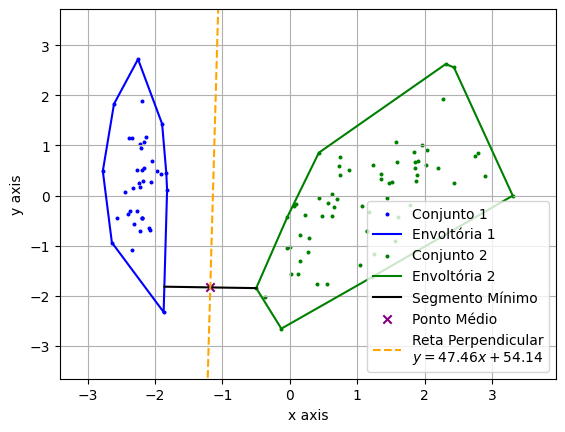

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/iris.prepared.csv"
default_classification = "Iris-setosa" # se é iris-setosa ou não... isso que iremos classificar!

iris = load_dataset(dataset_url, default_classification)

run_classifier(iris)

### <a id='toc1_6_2_'></a>[Breast Cancer 🔬](#toc0_)

Diagnóstico de cancer de mama com diversos atributos medidos por exames médicos. Neste exemplo, vemos que dados classificados como "maligno" (em azul) mesmo tendo características menos padronizadas, ainda estão em interseção com a classificação não maligna. Vemos que isso impossibilita a sua separabilidade.

Não é linearmente separável


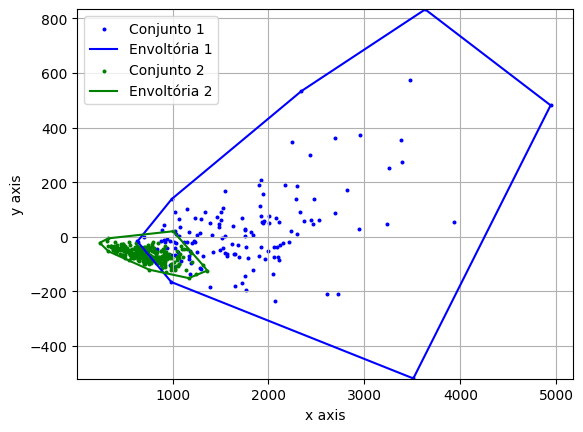

In [ ]:
dataset_url = "https://raw.githubusercontent.com/mateuskrause/keel-sklearn-csv/master/sklearn_classification/breast_cancer.csv"
default_classification = 0

breast_cancer = load_dataset(dataset_url, default_classification)

run_classifier(breast_cancer)

### <a id='toc1_6_3_'></a>[Segment 🪢](#toc0_)

Este é um conjunto de dados de segmentação de imagem, onde cada classificação é uma imagem e as features representam certas características observadas. Temos que uma das imagens pode ser claramente diferenciada, sendo linearmente separável.

É linearmente separável
Modelo com equação da reta: y = 7.8919535809888455x + -32.79220937611068
Precisão: 1.0
Revocação: 1.0
F1-score: 1.0


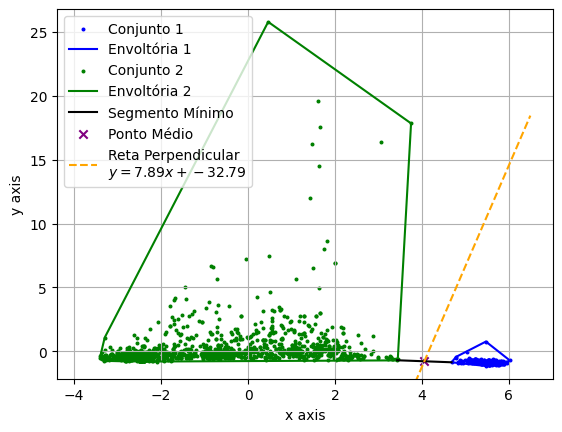

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/segment.prepared.csv"
default_classification = 2

segment = load_dataset(dataset_url, default_classification)

run_classifier(segment)

### <a id='toc1_6_4_'></a>[Adult 🧑](#toc0_)

Conjunto extraído em 1994 dos dados do censo dos Estados Unidos. Contém atributos descrevendo algumas informações sociais (idade, raça, gênero, estado civil, etc) sobre os cidadãos cadastrados. A classificação é se certo cidadão ultrapassa a renda de 50 mil dólares por ano.

Não é linearmente separável


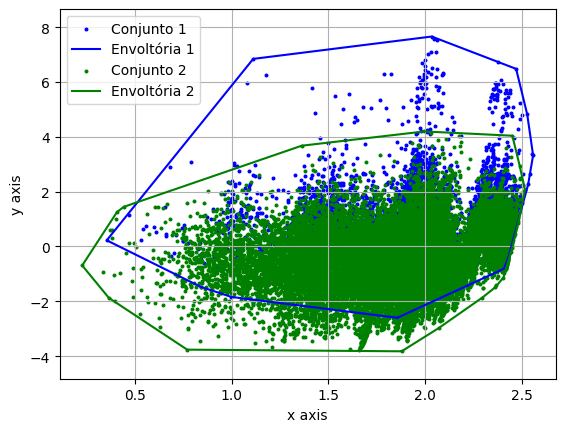

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/adult.prepared.csv"
default_classification = ">50K"

adult = load_dataset(dataset_url, default_classification)

run_classifier(adult)

### <a id='toc1_6_5_'></a>[Dermatology 🥼](#toc0_)

Exames e características de pessoas para diagnóstico de doenças eritematoescamosas.

É linearmente separável
Modelo com equação da reta: y = -1.067918581646046x + 1.3033707595735005
Precisão: 1.0
Revocação: 1.0
F1-score: 1.0


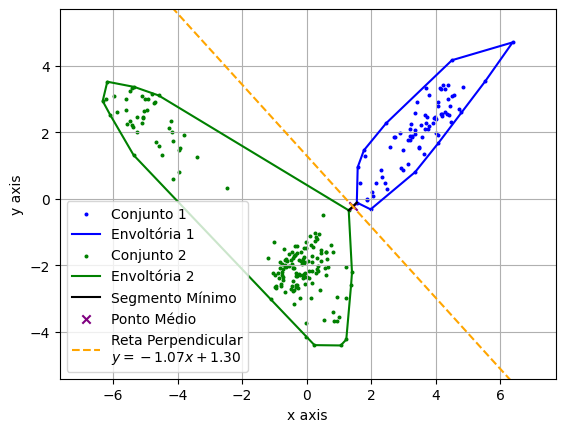

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/dermatology.prepared.csv"
default_classification = 1

galo = load_dataset(dataset_url, default_classification)

run_classifier(galo)

### <a id='toc1_6_6_'></a>[Galo 🐓](#toc0_)
Partidas do Atletico pelo Brasileirão de 2019 a 2022, fonte: https://fbref.com . Há 3 classes, vitória, derrota e empate e 2 variáveis, *expected goals* do atletico e do adversário, que é uma estatística que mede quantos gols a equipe deveria ter marcado conforme as oportunidades criadas.

O objetivo é analisar se apenas com essa estatística poderíamos prever resultados, mas vemos que o conjunto não é separável.

(Excepcionalmente este dataset está hospedado fora do repositório padrão, porém o pré-processamento seguiu os mesmos padrões)

Não é linearmente separável


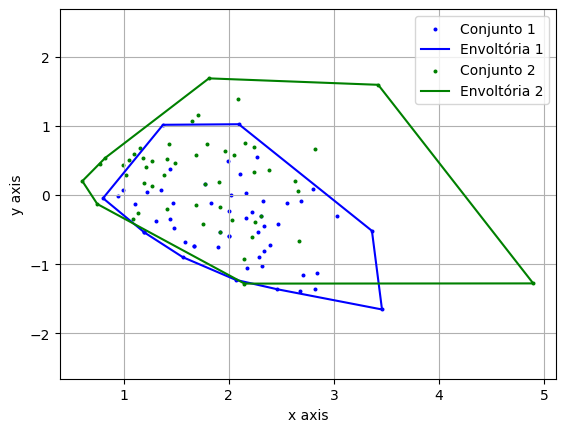

In [ ]:
dataset_url = "https://drive.google.com/uc?id=1Meh9LcRo_melHMboKZ4Z_xQNgK2n1YQo"
default_classification = 1

galo = load_dataset(dataset_url, default_classification)

run_classifier(galo)

### <a id='toc1_6_7_'></a>[New Thyroid 🩺](#toc0_)

Este dataset é sobre doença da tireóide. Classificamos se um paciente possuiu hipotireoidismo ou não.

Excepcionalmente neste caso, utilizamos uma *seed* específica para o embaralhamento do dataset, isso porque os dados podem ocorrer de não ser separáveis por poucas entradas. Logo, podemos ter certeza que alguns casos de testes trarão classificações erradas, levando a métricas menos exatas assim como observado.

É linearmente separável
Modelo com equação da reta: y = -12.84924465443786x + 13.37508017027292
Precisão: 1.0
Revocação: 0.5454545454545454
F1-score: 0.7058823529411764


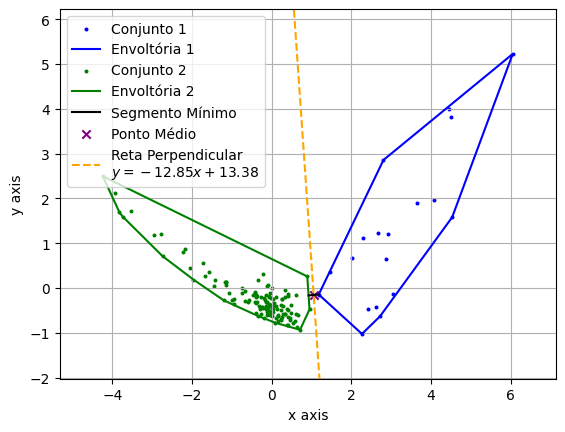

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/newthyroid.prepared.csv"
default_classification = 3

dataset = load_dataset(dataset_url, default_classification, 1306254495)

run_classifier(dataset)

### <a id='toc1_6_8_'></a>[Twonorm 📊](#toc0_)

Representa uma distribuição normal multivariada, e existe apenas duas classificações possíveis. Um claro exemplo de não separabilidade.

<img src="https://sci2s.ugr.es/keel/dataset/images/twonorm.gif" alt="image" width="20%">




Não é linearmente separável


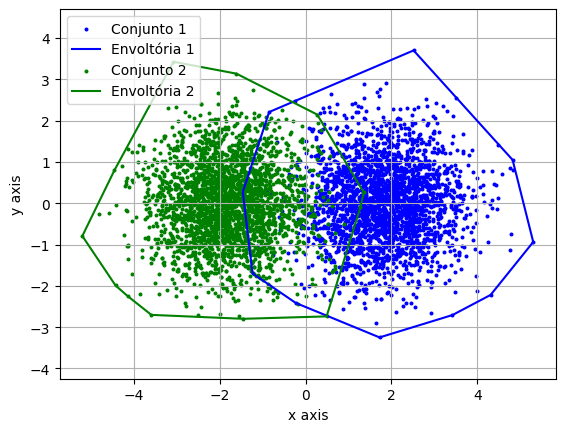

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/twonorm.prepared.csv"
default_classification = 0

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)

### <a id='toc1_6_9_'></a>[Zoo 🦁](#toc0_)

Conjunto simples de características de diversos animais. Vemos que as especificidades do grupo que o urso pertence, por exemplo, é bem diferente de grupos com os seguintes representantes: galinha, tartaruga, cavalo-marinho, sapo e escorpião.

É linearmente separável
Modelo com equação da reta: y = -0.2510710772111265x + 0.7918211935862867
Precisão: 1.0
Revocação: 1.0
F1-score: 1.0


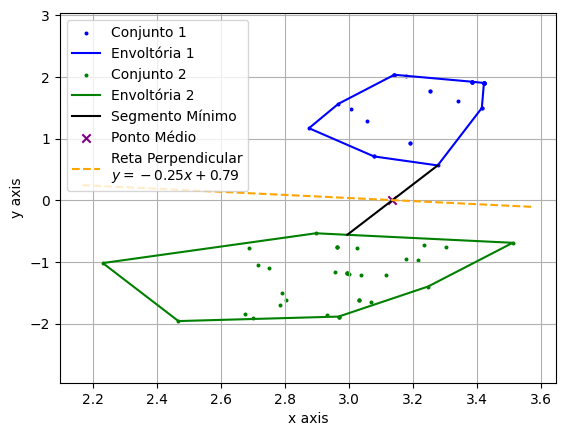

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/zoo.prepared.csv"
default_classification = 1

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)

### <a id='toc1_6_10_'></a>[Kr-vs-K ♟️](#toc0_)
Um conjunto de dados de final de jogo de xadrez representa as posições no tabuleiro do rei branco, da torre branca e do rei preto. O objetivo é determinar o número ideal de turnos necessários para que as brancas ganhem o jogo, que pode se empate se demorar mais de dezesseis turnos.

Tentamos separar nesse exemplo se vai a empate ou não. É um claro exemplo de não separabilidade.

Não é linearmente separável


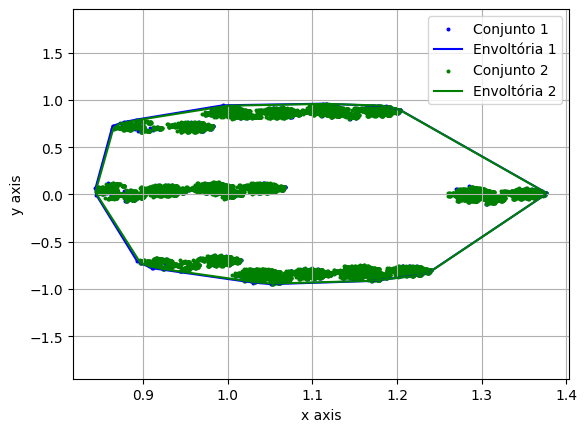

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/kr-vs-k.prepared.csv"
default_classification = "draw"

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)

### <a id='toc1_6_11_'></a>[Lymphography 💉](#toc0_)

Dados sobre presença de linfoma. Classificações sobre presença de linfoma e seu estado atual. No exemplo, tentamos classificar os ditos como fibrose.

É linearmente separável
Modelo com equação da reta: y = -13.473870122646373x + 28.19156195714911
Precisão: 0.5
Revocação: 1.0
F1-score: 0.6666666666666666


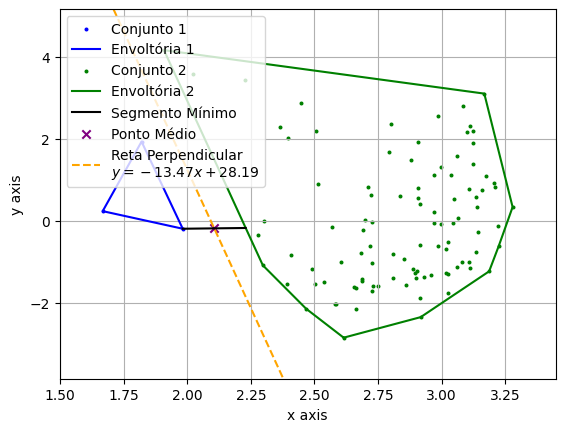

In [ ]:
dataset_url = "https://media.githubusercontent.com/media/mateuskrause/keel-sklearn-csv/master/keel_standard_classification/onehot/lymphography.prepared.csv"
default_classification = "fibrosis"

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)

### <a id='toc1_6_12_'></a>[Digits 7️⃣](#toc0_)

Dataset contém imagens de dígitos escritos à mão. Suas características são valores de intensidade em 8x8 pixels. Tentamos aplicar nosso modelo à classificação do número 0, mas podemos esperar que não é separável.

Especificamente, a envoltória está dentro de outra. Isso ocorre pois os padrões visualizados com o número 0 são comuns a ponto de não possuir atributos únicos o suficiente. Este é um exemplo em que classificamos como não sendo linearmente separável mesmo as envoltórias não se interceptando, pois não faria sentido definir um modelo neste caso.

Não é linearmente separável


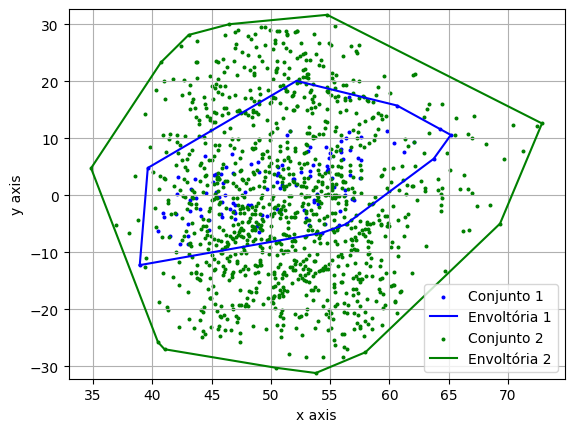

In [ ]:
dataset_url = "https://raw.githubusercontent.com/mateuskrause/keel-sklearn-csv/master/sklearn_classification/digits.csv"
default_classification = 0

digits = load_dataset(dataset_url, default_classification)

run_classifier(digits)

### <a id='toc1_6_13_'></a>[Extras ➕](#toc0_)

Datasets extras fictícios, criados externamente utilizando a função *make_classification* do Scikit-Learn. Foram projetados para serem linearmente separáveis a fim de demonstrar os algoritmos apresentados.

#### <a id='toc1_6_13_1_'></a>[Synthetic-1 🐧](#toc0_)

Possui 45 colunas de características e duas classificações possíveis. Observamos que o modelo acerta perfeitamente.

É linearmente separável
Modelo com equação da reta: y = 3.4986336819884416x + 11.104519176535604
Precisão: 1.0
Revocação: 1.0
F1-score: 1.0


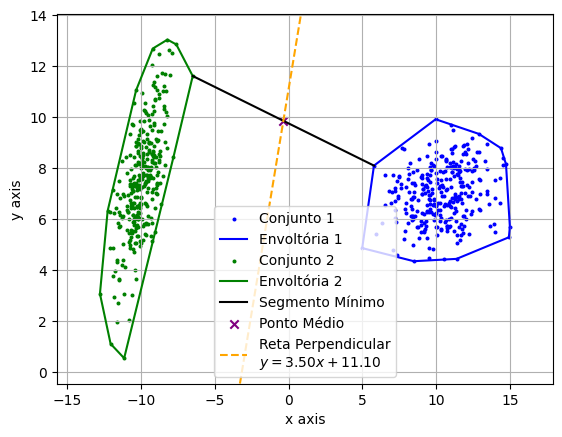

In [ ]:
dataset_url = "https://drive.google.com/uc?id=1osbWeoxSb9hEbHBdX-1m4mx4VRnx4J9e"
default_classification = 1

galo = load_dataset(dataset_url, default_classification)

run_classifier(galo)

#### <a id='toc1_6_13_2_'></a>[Synthetic-2 🐈](#toc0_)

Possui 5 colunas de caracteríticas e duas classificações possíveis. Vemos que o modelo criado não é totalmente eficaz.

É linearmente separável
Modelo com equação da reta: y = 0.18407871327701025x + -0.8213305475156008
Precisão: 1.0
Revocação: 0.9285714285714286
F1-score: 0.962962962962963


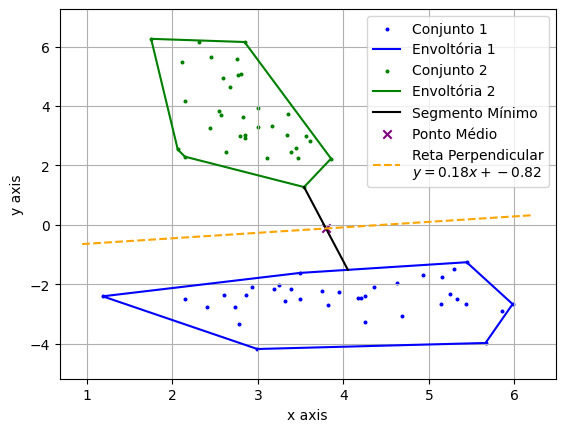

In [ ]:
dataset_url = "https://drive.google.com/uc?id=1GxU2jNC9Ofw4gkHaPRfBKHrH9iq7vnuq"
default_classification = 1

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)

#### <a id='toc1_6_13_3_'></a>[Synthetic-3 🐺](#toc0_)

Possui 8 colunas de caracteríticas e duas classificações possíveis. Neste conjunto de dados a proximidade causa casos em que a classificação não é a mais adequada.

É linearmente separável
Modelo com equação da reta: y = 1.311817058145255x + -4.8249030822420265
Precisão: 0.9782608695652174
Revocação: 0.9782608695652174
F1-score: 0.9782608695652174


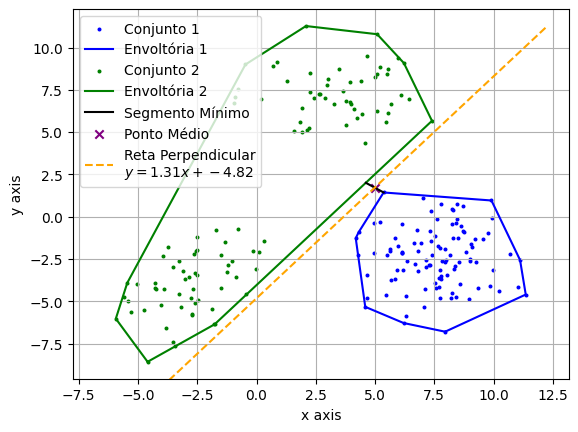

In [ ]:
dataset_url = "https://drive.google.com/uc?id=1LMDoA-e7BwOyXySA1oIe5eo-zXeN_Hdq"
default_classification = 1

dataset = load_dataset(dataset_url, default_classification)

run_classifier(dataset)

## <a id='toc1_7_'></a>[Conclusões](#toc0_)

Algoritmos geométricos possuem um papel importante em diversas áreas, com técnicas para tornar procedimentos mais eficientes. Neste caso, vimos que podemos resolver uma instância do problema de criação de modelos de classificação em aprendizado supervisionado aplicando algoritmos de envoltória convexa e interseção de segmentos.

Por se tratar muitas vezes de conjuntos de dados enormes, é de grande importância a utilização de técnicas que ajudam a processar mais eficientemente para facilitar o aprimoramento de um determinado modelo. Assim como apresentado anteriormente, utilizamos algoritmos presentes na literatura que têm complexidades adequadas para os problemas definidos. No algoritmo de interseção, vimos que o comportamento em testes reais favorecia certas implementações dado algum dataset: em casos extremos o algoritmo mais eficiente era melhor, porém em certos casos menores sua versão ingênua tinha algumas vantagens. Dessa forma, concluimos que outras métricas de complexidades são tão importantes quanto o limite assintótico superior.

Como restringimos o número de dimensões por conta dos métodos aplicados, tivemos que utilizar algoritmos externos que nos ajudam a tratar os dados n-dimensionais e os reduzir para apenas duas. O uso do SVD neste caso, mesmo que essencial, mostra que há sempre perdas: durante nossos testes, datasets de mundo real que já são conhecidos por não serem normalmente separáveis se tornam ainda mais complicados de encontrar situações que dados de certa classificação não ocupam o mesmo espaço de outras. Somado com o nosso escopo de encontrar um modelo apenas se os dados são totalmente separáveis, a busca por datasets que têm as características se tornou arduosa, porém ainda possível de ser feita.

Ao fim, percebemos que o algoritmo de classificação implementado mesmo parecendo complexo em uma primeira observação, é composto por pequenas partes e ideias, sintetizadas sobre conceitos geométricos. A implementação desse projeto ainda ajudou no entendimento de alguns padrões utilizados na literatura de aprendizado de máquina, juntamente com técnicas para o tratamento de dados - sendo essa uma parte mais desafiadora do que se pensava inicialmente. Os testes finais comprovam mais do que a corretude de certo algoritmo: com as informações dos datasets, temos uma forma visual de interpretar dados e entender seus significados reais.

## <a id='toc1_8_'></a>[Referências](#toc0_)

Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2002). Introduction to Algorithms. MIT.

Lecture #21 Sweep-Line and Segment Intersection - Design & Analysis of Algorithms (2017), (https://www.cs.cmu.edu/~15451-f17/lectures/lec21-sweepline.pdf)